# `SolverOptimizer`: Comparing Implicit/Explicit Time-Domain Integrators

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from quantumnetworks import SingleModeSystem, MultiModeSystem, plot_full_evolution, SolverOptimizer
import numpy as np
import matplotlib.pyplot as plt

## ---------Demo for PM5: Forward Euler Integrator---------

### Run 1 (Δt = 0.02): Unstable!

In [ ]:
# pre optimization
omega_a = 2*np.pi*1
delta = 2*np.pi*0.2
A_in = lambda t: np.exp(1j * (omega_a + delta) * t) #default A_in is used
sys = SingleModeSystem(params={"omega_a": omega_a, "kappa_a": 0.001}, A_in = A_in)
x_0 = np.array([0,0])
ts = np.linspace(0, 20, 1001)
X = sys.forward_euler(x_0, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()

### Run 2 (Δt = 0.002): Unstable, but better!

In [ ]:
# pre optimization
omega_a = 2*np.pi*1
delta = 2*np.pi*0.2
A_in = lambda t: np.exp(1j * (omega_a + delta) * t) #default A_in is used
sys = SingleModeSystem(params={"omega_a": omega_a, "kappa_a": 0.001}, A_in = A_in)
x_0 = np.array([0,0])
ts = np.linspace(0, 20, 10001)
X = sys.forward_euler(x_0, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()

### Run 3: (Δt = 0.0004): Stability Break-Even

In [ ]:
# pre optimization
omega_a = 2*np.pi*1
delta = 2*np.pi*0.2
A_in = lambda t: np.exp(1j * (omega_a + delta) * t) #default A_in is used
sys = SingleModeSystem(params={"omega_a": omega_a, "kappa_a": 0.001}, A_in = A_in)
x_0 = np.array([0,0])
ts = np.linspace(0, 20, 50001)
X = sys.forward_euler(x_0, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"])
ax.legend()

### Run 4: Use `SolverOptimizer` to get within 1% error

In [ ]:
opt = SolverOptimizer(sys, x_0, 0, 20)
dchi_2s, dts = opt.sweep_dt()

In [ ]:
fig = plt.figure(figsize=(4, 3), dpi=200)
ax = fig.subplots()

ax.semilogy(1/dts, dchi_2s)
ax.set_xlabel("1/dt (Ghz)")
ax.set_ylabel("$\|X - X_{prev}\|_2/\|X_{prev}\|_2}$")
ax.set_title(f"Convergence of solver")
plt.show()

#### Calculate Reference Solution x_r(t) using `Δt_ref = 3.90625e-05` from optimizer

In [ ]:
Δt_ref = dts[-1]

ts = np.linspace(0, 20, int(20/Δt_ref + 1))
X_r = sys.forward_euler(x_0, ts)

In [ ]:
fig, ax = plot_full_evolution(X_r, ts, labels=["$q_a$","$p_a$"])
ax.legend()

### Estimated Error from Reference Solution

In [ ]:
num_steps = np.array([1000*2**i for i in range(10)])
dts_err = 20/num_steps
dchi_2s_err = opt.sweep_dt_err(X_r, dts_err, solver_method="forward_euler")

In [ ]:
fig = plt.figure(figsize=(4, 3), dpi=200)
ax = fig.subplots()

ax.semilogy(1/dts_err[:-1], dchi_2s_err[:-1])
ax.set_xlabel(r"$1/\Delta t$ (GHz)")
ax.set_ylabel(r"$\|X_r - X\|_2/\|X\|_2}$")
ax.set_title(f"Convergence of solver")

Δt_err = 0.02
ax.axvline(x=1/Δt_err, color='orange', linestyle='-.', linewidth=1, label=r'$\Delta t = 0.02$: Unstable')

Δt_err = 0.002
ax.axvline(x=1/Δt_err, color='b', linestyle='-.', linewidth=1, label=r'$\Delta t = 0.002$: Unstable, but Better')

Δt_err = 0.0004
ax.axvline(x=1/Δt_err, color='green', linestyle='-.', linewidth=1, label=r'$\Delta t_u = 0.0004$: Stability Break-Even')

ε_u = 0.06
ax.hlines(y=ε_u, xmin=-250, xmax=1/Δt_err, linewidth=1.2, color='green', linestyle='-', label=r'Break-Even Error: $\varepsilon_u = 0.06$')


Δt_a = 1/9825
ax.axvline(x=1/Δt_a, color='k', linestyle='-.', linewidth=1, label=r'$\Delta t_a =$1.017e-4')
ε_a = 0.01
ax.hlines(y=ε_a, xmin=-250, xmax=1/Δt_a, linewidth=1.2, color='k', linestyle='-', label=r'Acceptable Error: $\varepsilon_a = 0.01$')
ax.plot([], [], label=r'$\Delta t_r =$3.906e-5')



plt.xlim(-250, 12500)
ax.legend(loc='best', fontsize=7)
plt.show()

In [ ]:
Δt_ref

In [ ]:
Δt_a

## 

## ---------Demo for Final Presentation---------

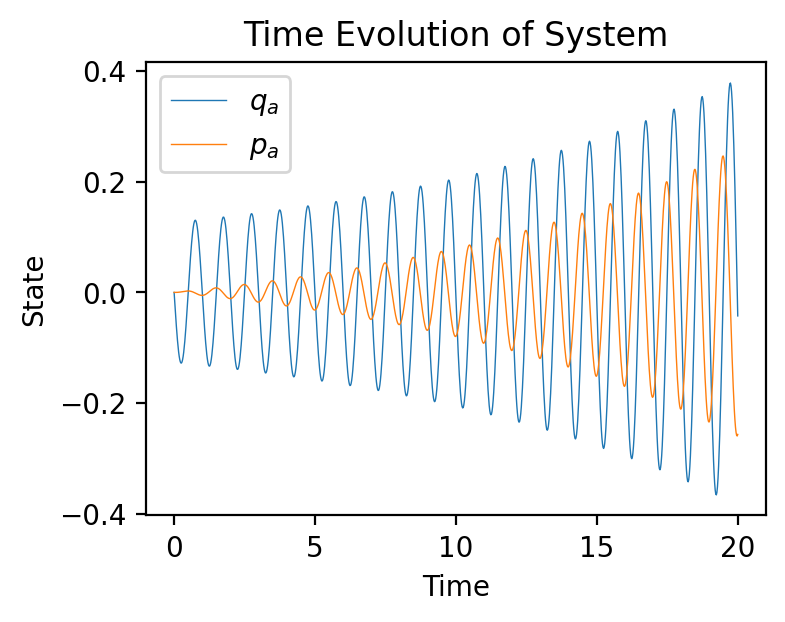

In [3]:
# single mode system
f_a = 1 #GHz
omegas = [2*np.pi*f_a]
kappas = [2*np.pi*0.1] # no drive
gammas = [2*np.pi*0] # no loss
kerrs = [2*np.pi*0] # no non-linearity
couplings = []
drives = {0: lambda t: np.exp(1j*(2*np.pi*f_a)*t)}
system = MultiModeSystem(params={"omegas":omegas, "kappas":kappas,"gammas":gammas,"kerrs":kerrs,"couplings":couplings, "drives":drives})
x_0 = np.array([0,0])
ts = np.linspace(0, 20, 1001)
X = system.forward_euler(x_0, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"], lw=.5)
ax.legend()

In [4]:
optimizer = SolverOptimizer(system, x_0, 0, 20)
dchi_2s, dts = optimizer.sweep_dt(threshold=0.0001)

1000
2000
0.6961224874120384
4000
0.12388445802352484
8000
0.04048628441449599
16000
0.01706306591207233
32000
0.007895475119334453
64000
0.0038043610392191705
128000
0.001868083553591601
256000
0.0009257243676490863
512000
0.00046080800228764706
1024000
0.00022989356056018267
2048000
0.00011481955565574349
4096000
5.7378019718379895e-05


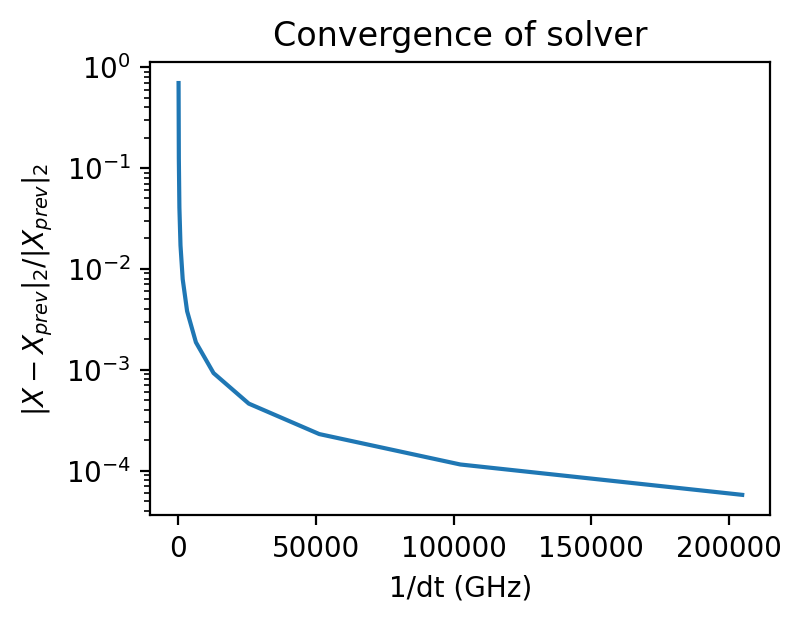

In [5]:
fig = plt.figure(figsize=(4, 3), dpi=200)
ax = fig.subplots()

ax.semilogy(1/dts, dchi_2s)
ax.set_xlabel("1/dt (GHz)")
ax.set_ylabel("$\|X - X_{prev}\|_2/\|X_{prev}\|_2}$")
ax.set_title(f"Convergence of solver")
plt.show()

#### Calculate Reference Solution x_r(t) using `Δt_ref = 7.8125e-05` from optimizer

In [6]:
Δt_ref = dts[-1]

ts = np.linspace(0, 20, int(20/Δt_ref + 1))
X_r = system.forward_euler(x_0, ts)

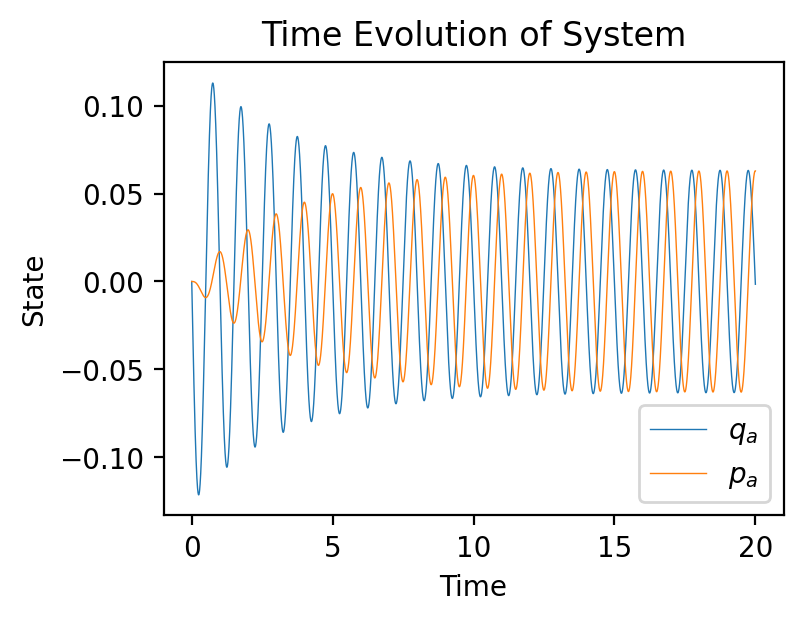

In [7]:
fig, ax = plot_full_evolution(X_r, ts, labels=["$q_a$","$p_a$"], lw=.5)
ax.legend()

### Estimated Error from Reference Solution: `forward_euler`

In [111]:
num_steps_FE = np.array([62.5*2**i for i in range(14)])
dts_err_FE = 20/num_steps_FE
dchi_2s_err_FE, runtimes_FE = optimizer.sweep_dt_err(X_r, dts_err_FE, solver_method="forward_euler")

100%|█████████████████████████████████████████████████████████████| 14/14 [01:34<00:00,  6.73s/it]


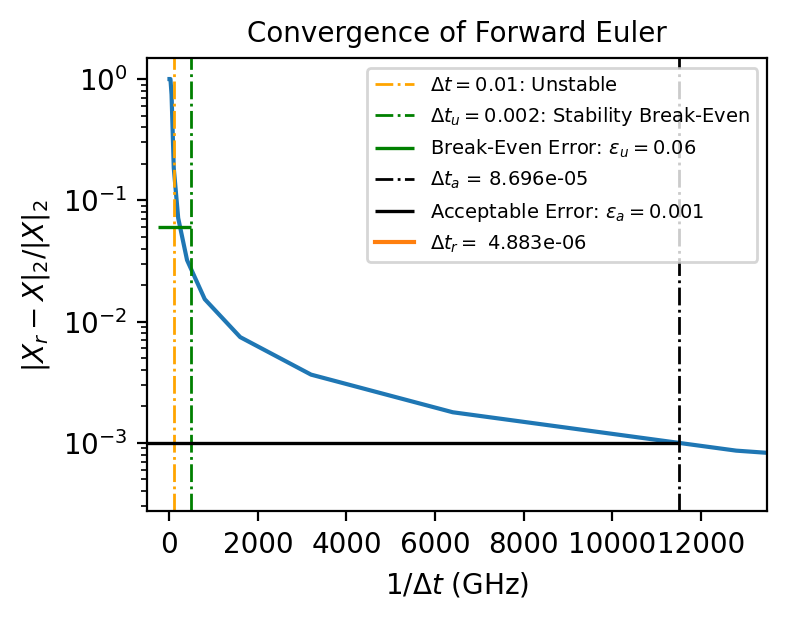

In [14]:
fig = plt.figure(figsize=(4, 3), dpi=200)
ax = fig.subplots()

ax.semilogy(1/dts_err_FE, dchi_2s_err_FE)
ax.set_xlabel(r"$1/\Delta t$ (GHz)")
ax.set_ylabel(r"$\|X_r - X\|_2/\|X\|_2}$")
ax.set_title(f"Convergence of Forward Euler", fontsize=10)

Δt_err = 0.01
ax.axvline(x=1/Δt_err, color='orange', linestyle='-.', linewidth=1, label=r'$\Delta t = 0.01$: Unstable')

Δt_err = 0.002
ax.axvline(x=1/Δt_err, color='green', linestyle='-.', linewidth=1, label=r'$\Delta t_u = 0.002$: Stability Break-Even')

ε_u = 0.06
ax.hlines(y=ε_u, xmin=-250, xmax=1/Δt_err, linewidth=1.2, color='green', linestyle='-', label=r'Break-Even Error: $\varepsilon_u = 0.06$')


Δt_a = 1/11500
ax.axvline(x=1/Δt_a, color='k', linestyle='-.', linewidth=1, label=fr'$\Delta t_a$ = {Δt_a:.3e}')
ε_a = 0.001
ax.hlines(y=ε_a, xmin=-500, xmax=1/Δt_a, linewidth=1.2, color='k', linestyle='-', label=r'Acceptable Error: $\varepsilon_a = 0.001$')
ax.plot([], [], label=fr'$\Delta t_r =$ {Δt_ref:.3e}')



plt.xlim(-500, 13500)
ax.legend(loc='upper right', fontsize=7)
plt.show()

### Estimated Error from Reference Solution: `trapezoidal`

In [109]:
num_steps_trap = np.array([62.5*2**i for i in range(9)])
dts_err_trap = 20/num_steps_trap
dchi_2s_err_trap, runtimes_trap = optimizer.sweep_dt_err(X_r, dts_err_trap, solver_method="trapezoidal")

100%|███████████████████████████████████████████████████████████████| 9/9 [00:20<00:00,  2.26s/it]


### Estimated Error from Reference Solution: `trapezoidal_dynamic`

In [165]:
num_steps_trap_dyn = np.array([100*2**i for i in range(8)])
dts_err_trap_dyn = 20/num_steps_trap_dyn

dchi_2s_err_trap_dyn, runtimes_trap_dyn = optimizer.sweep_dt_err(
    X_r, 
    dts_err_trap_dyn, 
    solver_method="trapezoidal_dynamic", 
    calc_runtime=True,
    threshold_min=0.001, 
    factor=10
)

100%|███████████████████████████████████████████████████████████████| 8/8 [00:04<00:00,  1.91it/s]


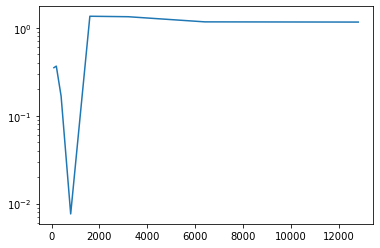

In [166]:
plt.semilogy(num_steps_trap_dyn, dchi_2s_err_trap_dyn)

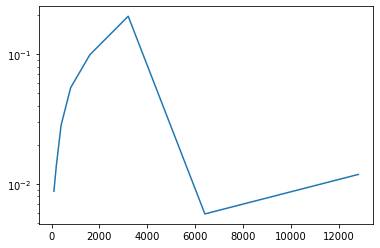

In [167]:
plt.semilogy(num_steps_trap_dyn, runtimes_trap_dyn)

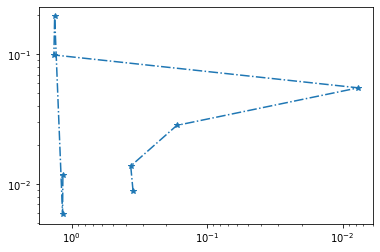

In [168]:
plt.loglog(dchi_2s_err_trap_dyn, runtimes_trap_dyn, '*-.', label="Trapezoidal")
plt.gca().invert_xaxis()


### Plot Errors!

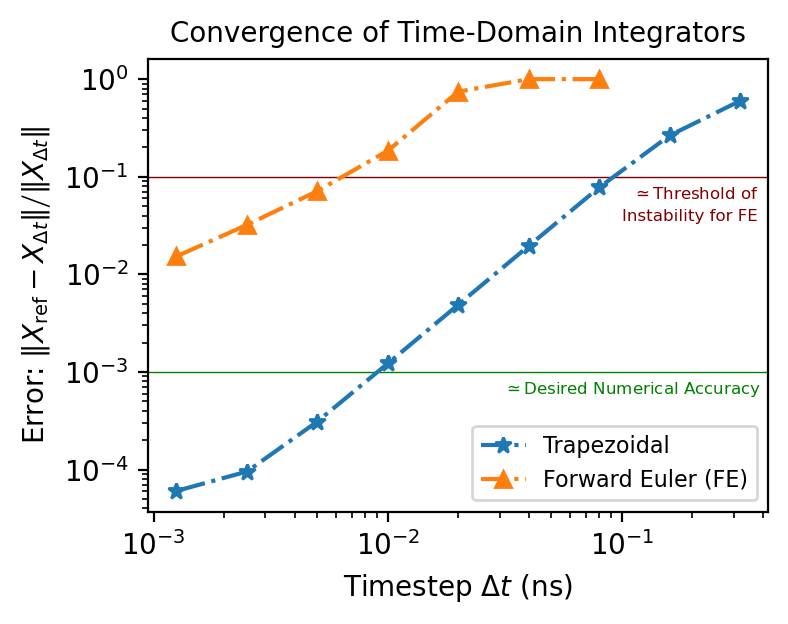

In [169]:
fig = plt.figure(figsize=(4, 3), dpi=200)
ax = fig.subplots()

ax.axhline(y=0.1, color='Maroon', linestyle='-', lw=.5)
plt.text(0.11, 0.06, r"$\simeq$Threshold of", fontsize=6, color='Maroon')
plt.text(0.1, 0.035, r"Instability for FE", fontsize=6, color='Maroon')

ax.axhline(y=0.001, color='Green', linestyle='-', lw=.5)
plt.text(0.031, 0.0006, r"$\simeq$Desired Numerical Accuracy", fontsize=6, color='Green')

ax.loglog(dts_err_trap, dchi_2s_err_trap, '*-.', label="Trapezoidal")
ax.loglog(dts_err_FE[2:9], dchi_2s_err_FE[2:9], '^-.', label="Forward Euler (FE)")
#ax.loglog(dts_err_trap_dyn, dchi_2s_err_trap_dyn, 'o-.', label="Trap Dyn")


ax.set_xlabel(r"Timestep $\Delta t$ (ns)")
ax.set_ylabel(r"Error: $\left.\|\!\|X_{{\rm ref}} - X_{{\Delta t}}\|\!| \right/ |\!|X_{{\Delta t}}|\!|}$")
ax.set_title(f"Convergence of Time-Domain Integrators", fontsize=10)


#plt.xlim(0, 20000)
ax.legend(loc='best', fontsize=8)
plt.show()

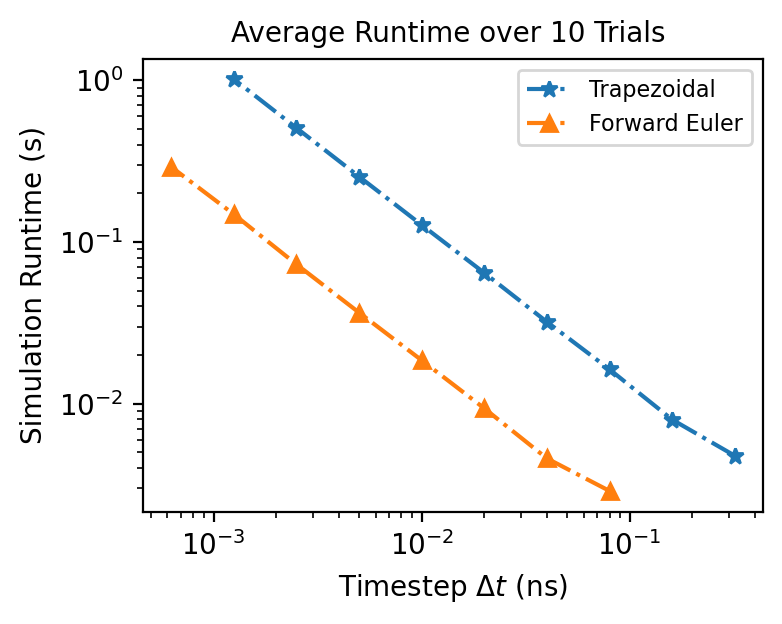

In [170]:
fig = plt.figure(figsize=(4, 3), dpi=200)
ax = fig.subplots()

ax.loglog(dts_err_trap, runtimes_trap, '*-.', label="Trapezoidal")
ax.loglog(dts_err_FE[2:10], runtimes_FE[2:10], '^-.', label="Forward Euler")
#ax.loglog(dts_err_trap_dyn, runtimes_trap_dyn, 'o-.', label="Trap Dyn")


ax.set_xlabel(r"Timestep $\Delta t$ (ns)")
ax.set_ylabel(r"Simulation Runtime (s)")
ax.set_title(f"Average Runtime over 10 Trials ", fontsize=10)

ax.legend(loc='best', fontsize=8)
plt.show()

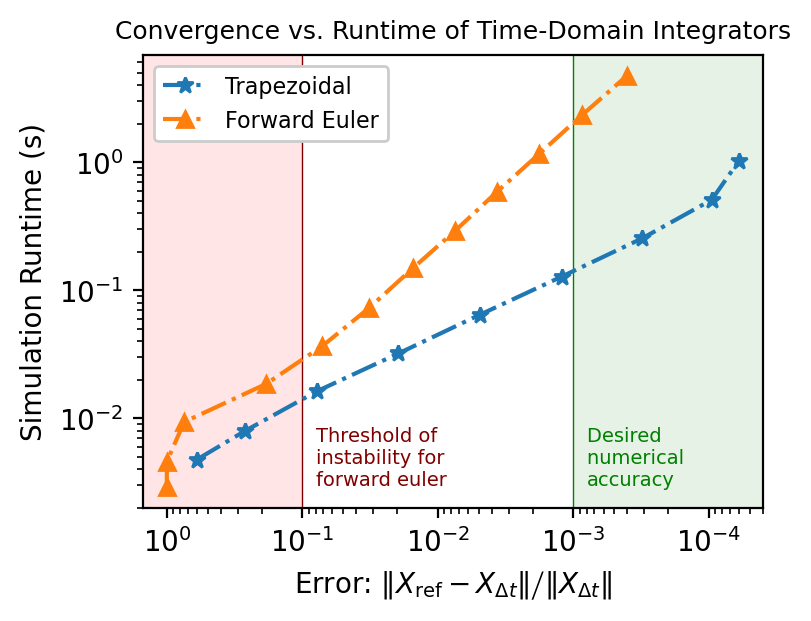

In [172]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=200)

red_label = r"""Threshold of
instability for
forward euler
"""
green_label = r"""Desired 
numerical 
accuracy
"""

# Plot Thresholds
plt.text(8e-2, 2e-3, red_label, fontsize=7, color='Maroon')
ax.axvline(x=0.1, color='Maroon', linestyle='-', lw=.5)
plt.text(8e-4, 2e-3, green_label, fontsize=7, color='Green')
ax.axvline(x=0.001, color='Green', linestyle='-', lw=.5)

# Shade Regions
ax.axvspan(1e-3, 4e-5, facecolor='Green', alpha=0.1, snap=True)
ax.axvspan(1.5, 1e-1, facecolor='Red', alpha=0.1, snap=True)

# Plot Data
ax.loglog(dchi_2s_err_trap, runtimes_trap, '*-.', label="Trapezoidal")
ax.loglog(dchi_2s_err_FE[2:], runtimes_FE[2:], '^-.', label="Forward Euler")
#ax.loglog(dchi_2s_err_trap_dyn, runtimes_trap_dyn, 'o-.', label="Trap Dyn")


# Figure Options
ax.set_ylabel(r"Simulation Runtime (s)")
ax.set_xlabel(r"Error: $\left.\|\!\|X_{{\rm ref}} - X_{{\Delta t}}\|\!| \right/ |\!|X_{{\Delta t}}|\!|}$")
ax.set_title(f"Convergence vs. Runtime of Time-Domain Integrators", fontsize=9)
plt.gca().invert_xaxis()
plt.xlim(left=1.5, right=4e-5)


ax.legend(loc='upper left', fontsize=8, framealpha=1)
plt.show()

In [ ]:
ts = np.linspace(0, 20, 1001)
X = system.forward_euler(x_0, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"], lw=.5)
ax.legend()
plt.title(f"Forward Euler: {len(ts) - 1} Timesteps")
plt.xlabel("Time (ns)")

In [ ]:
ts = np.linspace(0, 20, 1001)
X = system.trapezoidal(x_0, ts)
fig, ax = plot_full_evolution(X, ts, labels=["$q_a$","$p_a$"], lw=.5)
ax.legend()
plt.title(f"Trapezoidal: {len(ts) - 1} Timesteps")
plt.xlabel("Time (ns)")

Text(0.5, 0, 'Time (ns)')

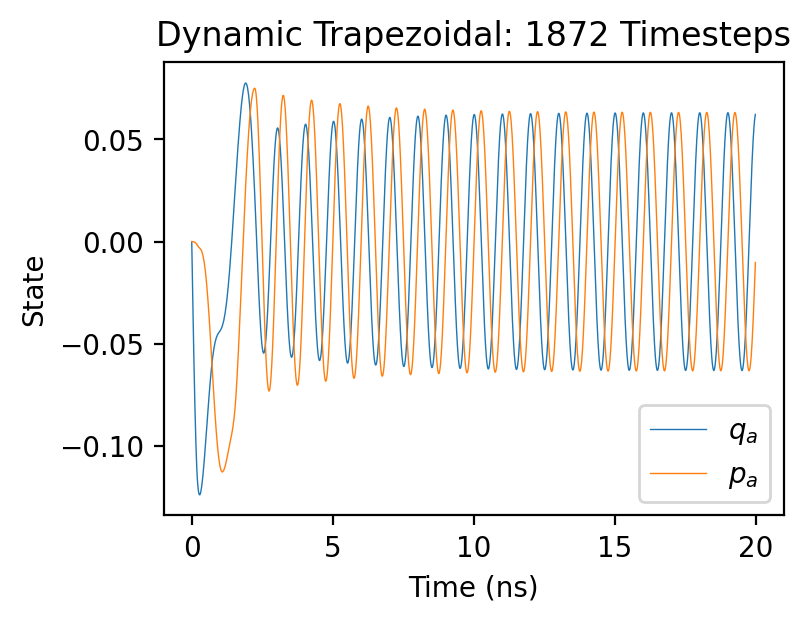

In [152]:
ts = np.linspace(0, 20, 2001)
X, dynamic_ts = system.trapezoidal(x_0, ts, dynamic_dt=True, threshold_min=0.05, threshold_max=2, factor=1.2)
fig, ax = plot_full_evolution(X, dynamic_ts, labels=["$q_a$","$p_a$"], lw=.5)
ax.legend()
plt.title(f"Dynamic Trapezoidal: {len(dynamic_ts) - 1} Timesteps")
plt.xlabel("Time (ns)")